In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import statistics
import os
import scipy.stats as sts

In [2]:
city_data = pd.read_csv('Resources/city_data.csv')
ride_data = pd.read_csv('Resources/ride_data.csv')


In [3]:
joined_files = pd.merge(ride_data , city_data, how='left', on=['city' , 'city'])

In [4]:
PyBer_Data_DF = pd.DataFrame(joined_files)
PyBer_Data_DF

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [5]:
PyBer_Data_DF.isnull().sum()


city            0
date            0
fare            0
ride_id         0
driver_count    0
type            0
dtype: int64

In [6]:
PyBer_Data_DF.dtypes

city             object
date             object
fare            float64
ride_id           int64
driver_count      int64
type             object
dtype: object

In [7]:
PyBer_Data_DF['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [8]:
sum(PyBer_Data_DF['type'] == 'Urban')

1625

In [9]:
# creating a df for all of the city types

urban_cities_df = PyBer_Data_DF[PyBer_Data_DF['type'] == 'Urban']

rural_cities_df = PyBer_Data_DF[PyBer_Data_DF['type'] == 'Rural']

suburban_cities_df = PyBer_Data_DF[PyBer_Data_DF['type'] == 'Suburban']


In [10]:
# Get the number of rides for urban cities 

urban_ride_count = urban_cities_df.groupby(['city']).count()['ride_id']

rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']

suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']

In [11]:
# Get the average fare for each city 

urban_avg_fare = urban_cities_df.groupby(['city']).mean()['fare']

rural_avg_fare = rural_cities_df.groupby(['city']).mean()['fare']

suburban_avg_fare = suburban_cities_df.groupby(['city']).mean()['fare']

In [12]:
# Get the avg number of drivers for each city type

urban_driver_count = urban_cities_df.groupby(['city']).mean()['driver_count']

rural_driver_count = rural_cities_df.groupby(['city']).mean()['driver_count']

suburban_driver_count = suburban_cities_df.groupby(['city']).mean()['driver_count']



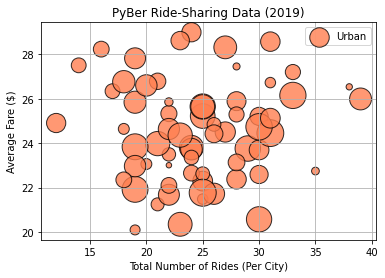

In [13]:
# Create our scatter plot for urban 

plt.scatter(urban_ride_count , urban_avg_fare, 

     s = 10 * urban_driver_count , color = 'coral' , 
    
     edgecolors='black' , linewidths=1,
    
        alpha=0.8 , label = 'Urban')

plt.title("PyBer Ride-Sharing Data (2019)")

plt.ylabel("Average Fare ($)")

plt.xlabel("Total Number of Rides (Per City)")

plt.grid(True)
# Add the legend.
plt.legend()

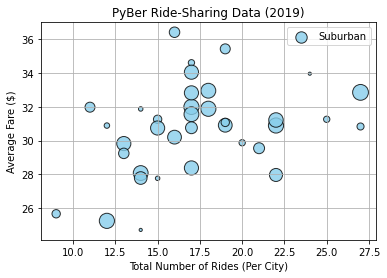

In [14]:
# Create our scatter plot for surburan

# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.title("PyBer Ride-Sharing Data (2019)")

plt.ylabel("Average Fare ($)")

plt.xlabel("Total Number of Rides (Per City)")

plt.grid(True)
# Add the legend.
plt.legend()

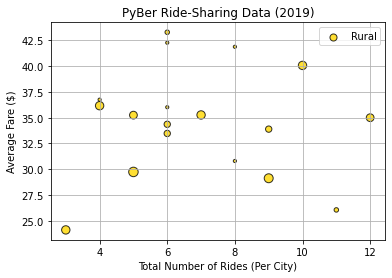

In [15]:
# Create our scatter for rural cities 

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

plt.title("PyBer Ride-Sharing Data (2019)")

plt.ylabel("Average Fare ($)")

plt.xlabel("Total Number of Rides (Per City)")

plt.grid(True)
# Add the legend.
plt.legend()

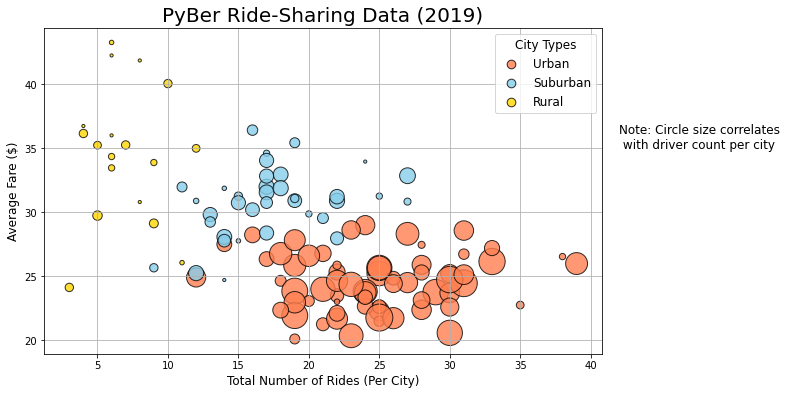

In [16]:
# Combining all of the charts into one chart 

plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count , 
   urban_avg_fare, 
   s = 10 * urban_driver_count , color = 'coral' , 
   edgecolors='black' , linewidths=1,
   alpha=0.8 , label = 'Urban')

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# Graph properties 
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Add the legend.
lgnd = plt.legend(fontsize = '12', mode = 'Expanded',
   scatterpoints = 1 , loc = 'best' , title = 'City Types')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Add a note to explain legend
plt.text(42 , 35, 'Note: Circle size correlates\n with driver count per city' , fontsize = '12')
# Show the plot
plt.show()


In [17]:
# Getting the summary statistics 
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [18]:
# Getting the summary statistics 
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [19]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2) # The 2 is how many decimal places to round by

(24.62, 17.36, 6.94)

In [20]:
round(urban_ride_count.median(),2)

24.0

In [21]:
# Calculate the mode of the ride count for the urban cities.
urban_ride_count.mode()

# NOTE: we have two modes—one at 22 and one at 25:

0    22
1    25
Name: ride_id, dtype: int64

In [22]:
# Calculate the measures of central tendency for the ride count for the urban cities using scipy.stats
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [23]:
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_suburban_ride_count:.2f}.")

mean_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for urban trips is {mean_suburban_ride_count}.")

mean_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for urban trips is {mean_suburban_ride_count}.")

The mean for the ride counts for urban trips is 17.36.
The median for the ride counts for urban trips is 17.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [24]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]

# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [25]:
# Get the driver count data from the urban cities.
urban_drivers = urban_cities_df['driver_count']
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

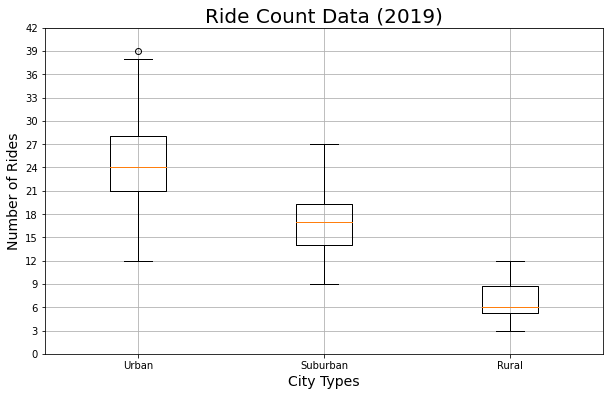

In [26]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

In [27]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


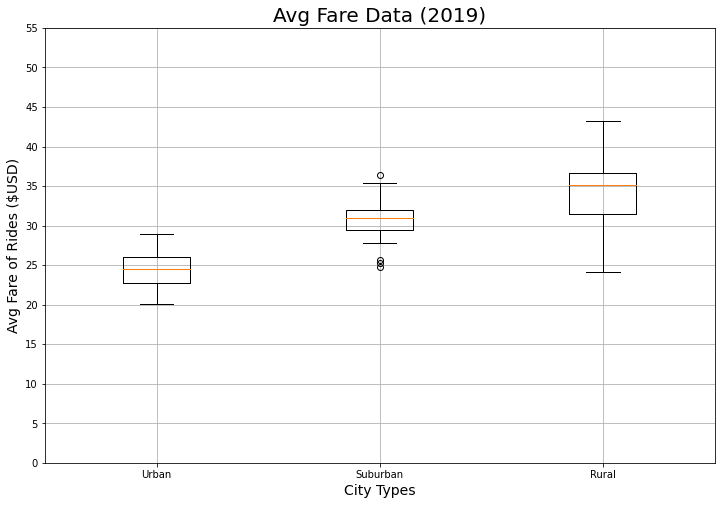

In [29]:
x_labels = ["Urban", "Suburban","Rural"]
avg_fare_data = [urban_avg_fare, suburban_avg_fare, rural_avg_fare]
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title('Avg Fare Data (2019)',fontsize=20)
ax.set_ylabel('Avg Fare of Rides ($USD)',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(avg_fare_data, labels=x_labels)
ax.set_yticks(np.arange(0, 56, step=5.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig3.png")
plt.show()